In [1]:
import numpy as np
import ssgetpy
import scipy
from IPython.display import display, Math
import matplotlib.pyplot as plt

/Users/mathildesimoni/anaconda3/envs/math/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Obtain matrices from the suitsparse library

In [2]:
result = ssgetpy.search(rowbounds = (36000, 37000), colbounds = (36000, 37000))
result

283,ATandT,onetone1,36057,36057,335552,real,No,No,0.074,0.043,frequency-domain circuit simulation problem,
284,ATandT,onetone2,36057,36057,222596,real,No,No,0.11,0.066,frequency-domain circuit simulation problem,
586,Hollinger,mark3jac080,36609,36609,214643,real,No,No,0.074,0.014,economic problem,
587,Hollinger,mark3jac080sc,36609,36609,214643,real,No,No,0.074,0.013,economic problem,
762,Nasa,pwt,36519,36519,326107,binary,Yes,No,1.0,1.0,duplicate structural problem,
880,Pothen,pwt,36519,36519,326107,binary,Yes,No,1.0,1.0,structural problem,
938,ND,nd12k,36000,36000,14220946,real,Yes,Yes,1.0,1.0,2D/3D problem,
1273,GHS_psdef,pwt,36519,36519,326107,binary,Yes,No,1.0,1.0,duplicate structural problem,
1289,GHS_psdef,wathen120,36441,36441,565761,real,Yes,Yes,1.0,1.0,random 2D/3D problem,
1387,Andrianov,net125,36720,36720,2577200,binary,No,No,1.0,1.0,optimization problem,


In [18]:
matrix = result[-1]
matrix.download(destpath = "matrices/net125.tar.gz")


net125: 2965504B [01:15, 39021.59B/s]                                           


('matrices/net125.tar.gz/net125.tar.gz',
 'matrices/net125.tar.gz/net125.tar.gz')

## Plot loss of orthogonality and condition number

In [2]:
from typing import List, Tuple, Callable, Any

def plot_1d(
    x: np.ndarray,
    y: np.ndarray,
    title: str,
    xlabel: str,
    ylabel: str,
    step: int = 1,
    fill_under: bool = True,
    remove_box: bool = True,
    x_range: Tuple = None,
    y_range: Tuple = None,
    scatter: bool = False,
    x_label_f: Callable = None,
    custom_y_ticks: bool = False,
    y_ticks: np.ndarray = None,
    y_tick_labels: np.ndarray = None,
    custom_x_ticks: bool = False,
    x_ticks: np.ndarray = None,
    x_tick_labels: np.ndarray = None,
    save_filename: str = None,
    show: bool = True,
    markersize_plot: int = 4,
) -> None:
    """Function for general plotting in 2d with x and y arrays as input."""
    # Downsample the x and y arrays
    x_downsampled = x[::step]
    y_downsampled = y[::step]

    # Create the plot
    plt.figure(figsize=(6, 4))
    if scatter:
        plt.scatter(x_downsampled, y_downsampled, marker=".", color="blue", s=10)
    else:
        plt.plot(
            x_downsampled,
            y_downsampled,
            marker=".",
            linestyle="-",
            color="blue",
            markersize=markersize_plot,
        )

    # Beautifying the plot
    # plt.title(title, fontsize=13, fontweight="medium")
    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Setting x and y axis ranges if provided
    if x_range is not None:
        plt.xlim(x_range)  # Set the x-axis range (tuple)
    if y_range is not None:
        plt.ylim(y_range)  # Set the y-axis range (tuple)

    # Adding customizations
    ax = plt.gca()  # Get the current axis
    if x_label_f is not None:
        ax.xaxis.set_major_formatter(FuncFormatter(x_label_f))
    if custom_y_ticks:
        if y_ticks is None or y_tick_labels is None:
            raise ValueError("Must provide y ticks and y tick labels")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_tick_labels)
    if custom_x_ticks:
        if x_ticks is None or x_tick_labels is None:
            raise ValueError("Must provide x ticks and x tick labels")
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels)
    # if fill_under:
    #     plt.fill_between(x_downsampled, y_downsampled, color="lightblue", alpha=0.3)
    if remove_box:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        # Remove ticks
        ax.yaxis.set_ticks_position("none")
        ax.xaxis.set_ticks_position("none")
    else:
        ax.spines["top"].set_color((0.8, 0.8, 0.8))
        ax.spines["right"].set_color((0.8, 0.8, 0.8))
        ax.spines["left"].set_color((0.8, 0.8, 0.8))
        ax.spines["bottom"].set_color((0.8, 0.8, 0.8))

    # plt.yscale("log")
    # Show the plot
    plt.tight_layout()
    if save_filename is not None:
        plt.savefig(save_filename, dpi = 350)
    if show:
        plt.show()
    else:
        plt.close()

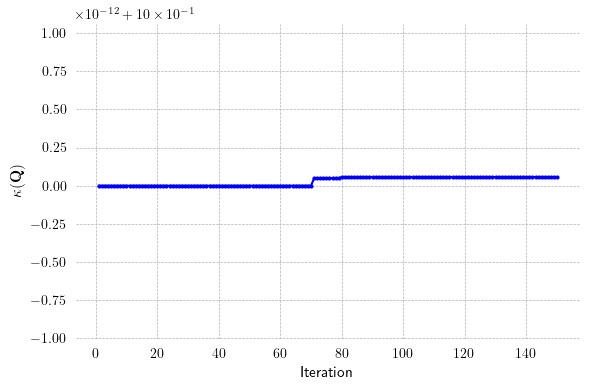

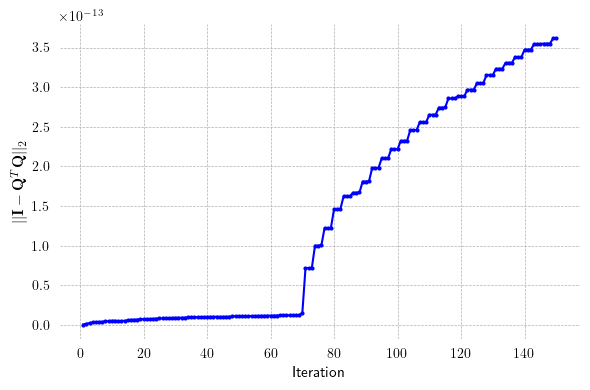

In [3]:
plt.rcParams['text.usetex'] = True

matrix = "D"
latex_matrix = r' ($\mathbf{D}$)'
loss = np.load("data/CGS_" + matrix + "_loss.npy")
cond = np.load("data/CGS_" + matrix + "_cond.npy")

n = len(loss)
iterations = np.array(range(1, n+1))

plot_1d(iterations, cond, r'Condition Number of $\mathbf{Q}$ vs. Iteration Count' + latex_matrix, "Iteration", r'$\kappa(\mathbf{Q})$', save_filename = "CGS_" + matrix + "_cond.png") 
plot_1d(iterations, loss, r"Loss of Orthogonality for $\mathbf{Q}$ vs. Iteration Count" + latex_matrix, r"Iteration", r'$|| \mathbf{I} - \mathbf{Q}^T \mathbf{Q} ||_2$', save_filename = "CGS_" + matrix + "_loss.png") 

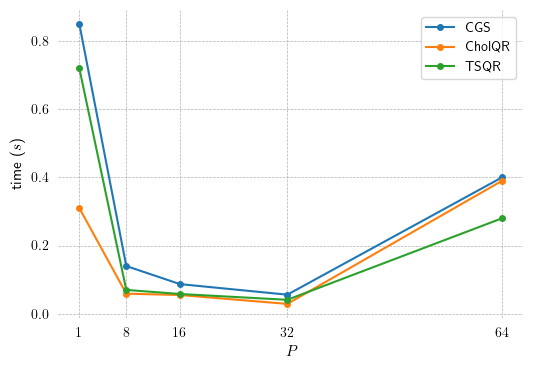

In [19]:
labels = [r' (Matrix $\mathbf{C}$)', r' (Matrix $\mathbf{D}$)']
times_CGS = [0.85, 0.14, 0.087, 0.056, 0.40]
times_chol = [0.31, 0.059, 0.055, 0.029, 0.39]
times_TSQR = [0.72, 0.070, 0.058, 0.041, 0.28]

processors = [1, 8, 16, 32, 64]

plt.figure(figsize=(6, 4))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(r'$P$', fontsize=11)
plt.ylabel(r"time ($s$)", fontsize=11)
plt.plot(processors, times_CGS, label = "CGS", marker=".", markersize=8)
plt.plot(processors, times_chol, label = "CholQR", marker=".", markersize=8)
plt.plot(processors, times_TSQR, label = "TSQR", marker=".", markersize=8)
plt.legend()
ax = plt.gca()
ax.set_xticks(processors)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_ticks_position("none")
plt.savefig("runtimes.png", dpi = 350)
# plt.yscale("log")

plt.show()
